In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Car%20Crashes.csv")

In [ ]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

# **What is the size of the dataset?**

In [ ]:
df.shape

(51, 8)

# **What are the column names in the dataset?**

In [ ]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

**`total:`**   This column likely represents the total number of car crashes or accidents in a specific geographic region or state.

**`speeding:`** This column represents the percentage of car crashes that occurred due to speeding or excessive speed.

**`alcohol:`** This column represents the percentage of car crashes that involved alcohol or driving under the influence of alcohol.

**`not_distracted:`** This column likely represents the percentage of car crashes where the driver was not distracted while driving. This may include incidents where the driver was focused on the road and not engaged in distracting activities.

**`no_previous:`** This column may represent the percentage of car crashes where the driver had no previous accidents or a clean driving record.

**`ins_premium:`** This column likely represents the average insurance premium cost in the specific geographic region or state. It may indicate the typical cost of car insurance for drivers in that area.

**`ins_losses:`** This column may represent the average insurance losses incurred in the specific geographic region or state. It could indicate the average financial losses associated with car accidents in that area.

**`abbrev:`** This column likely contains abbreviated state names or codes that identify the geographic region or state associated with the car crash data.

# **How many unique abbreviations are there in the "abbrev" column?**

In [ ]:
df["abbrev"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [ ]:
a= df["abbrev"].unique()
len(a)

51

# **What is the average speeding percentage across all the records?**

In [ ]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [ ]:
df["speeding"].mean()

4.998196078431373

# **What is the maximum alcohol percentage in the dataset?**

In [ ]:
df["alcohol"].max()

10.038

# **What is the minimum insurance premium in the dataset?**

In [ ]:
df["ins_premium"].min()

641.96

# **What is the average insurance loss in the dataset?**

In [ ]:
df["ins_losses"].mean()

134.49313725490197

# **Which state has the highest insurance premium?**


In [ ]:
df["ins_premium"].max()

1301.52

In [ ]:
high_ins = df[df["ins_premium"]==1301.52]
print(high_ins["abbrev"])

30    NJ
Name: abbrev, dtype: object


# **What is the correlation between speeding and alcohol percentages?**

In [ ]:
df["speeding"].corr(df["alcohol"])

0.6697185644227318

**`positive correlation`**

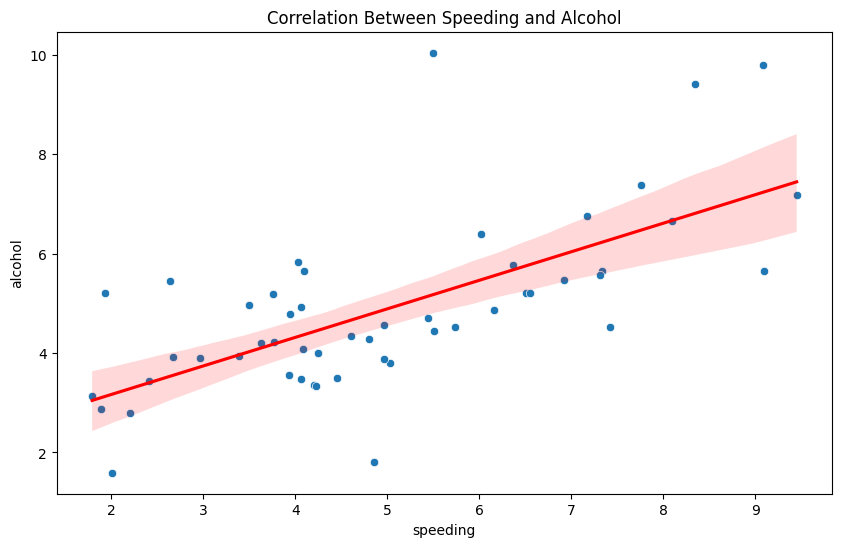

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot( x = "speeding" , y = "alcohol" , data = df)
sns.regplot(x = "speeding" , y = "alcohol" , data = df , scatter=False , color= "red")
plt.title("Correlation Between Speeding and Alcohol")
plt.show()

# **Calculate the average insurance premium for states**

In [ ]:
avg = df.groupby("abbrev")["ins_premium"].mean()
avg

abbrev
AK    1053.48
AL     784.55
AR     827.34
AZ     899.47
CA     878.41
CO     835.50
CT    1068.73
DC    1273.89
DE    1137.87
FL    1160.13
GA     913.15
HI     861.18
IA     649.06
ID     641.96
IL     803.11
IN     710.46
KS     780.45
KY     872.51
LA    1281.55
MA    1011.14
MD    1048.78
ME     661.88
MI    1110.61
MN     777.18
MO     790.32
MS     896.07
MT     816.21
NC     708.24
ND     688.75
NE     732.28
NH     746.54
NJ    1301.52
NM     869.85
NV    1029.87
NY    1234.31
OH     697.73
OK     881.51
OR     804.71
PA     905.99
RI    1148.99
SC     858.97
SD     669.31
TN     767.91
TX    1004.75
UT     809.38
VA     768.95
VT     716.20
WA     890.03
WI     670.31
WV     992.61
WY     791.14
Name: ins_premium, dtype: float64

# **Which state has the highest alcohol percentage in car crashes?**

In [ ]:
df["alcohol"].max()

10.038

In [ ]:
high_alco = df[df["alcohol"]== 10.038]
high_alco["abbrev"]

34    ND
Name: abbrev, dtype: object

# **What is the relationship between speeding and insurance losses?**

In [ ]:
df["speeding"].corr(df["ins_losses"])

-0.06592781347567782

**`negative relations`**

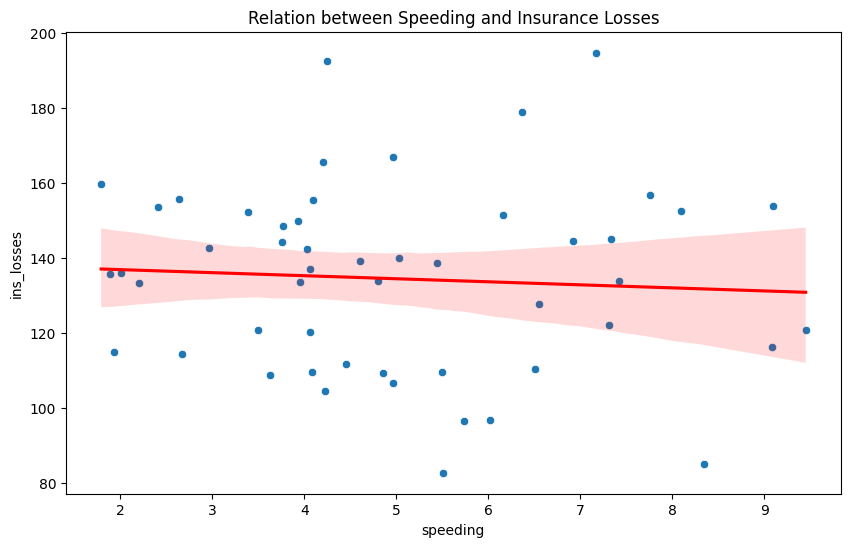

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot( x = "speeding" , y= "ins_losses" , data = df)
sns.regplot(x = "speeding" , y= "ins_losses" , data = df , scatter=False , color = "red")
plt.title("Relation between Speeding and Insurance Losses")
plt.show()

# **Calculate the total number of car crashes for each state.**

In [ ]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
result = df.groupby("abbrev")["total"].sum().reset_index()
result

,abbrev,total
0,AK,18.1
1,AL,18.8
2,AR,22.4
3,AZ,18.6
4,CA,12.0
5,CO,13.6
6,CT,10.8
7,DC,5.9
8,DE,16.2
9,FL,17.9


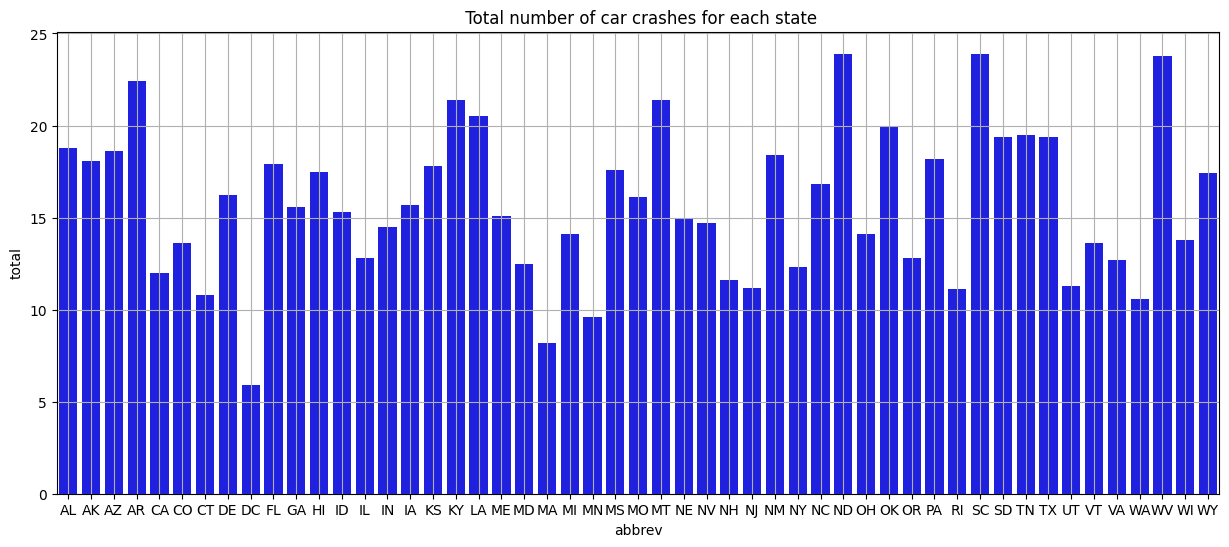

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot( x = "abbrev" , y = "total" , data = df , color = "blue")
plt.title(" Total number of car crashes for each state")
plt.grid(True)
plt.show()

# **How many states have more alcohol-related car crashes than speeding-related ones**

In [ ]:
alco_acc = df[df["alcohol"] > df["speeding"]]

alco_acc[["abbrev","alcohol","speeding"]]

,abbrev,alcohol,speeding
3,AR,5.824,4.032
9,FL,5.191,3.759
10,GA,3.900,2.964
14,IN,4.205,3.625
15,IA,3.925,2.669
17,KY,4.922,4.066
21,MA,2.870,1.886
22,MI,3.948,3.384
23,MN,2.784,2.208
24,MS,5.456,2.640


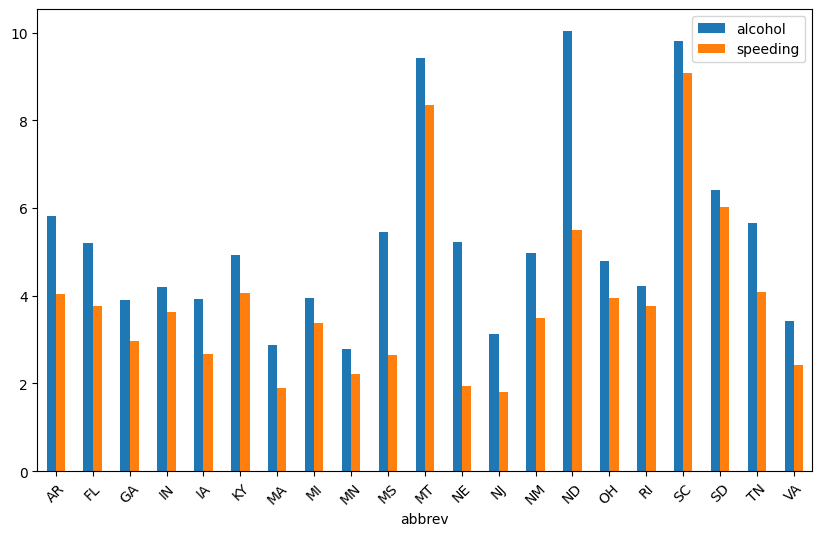

In [ ]:
alco_acc[["abbrev","alcohol","speeding"]].plot(kind = "bar" , x = "abbrev" , figsize = (10,6))
plt.xticks(rotation = 45)
plt.show()


# **Calculate the percentage of car crashes that were not distracted.**

In [ ]:
car_crash_not_distracted =  (df["not_distracted"] / df["total"])* 100

In [ ]:
car_crash_not_distracted

0      96.0
1      90.0
2      84.0
3      94.0
4      91.0
5      79.0
6      87.0
7      87.0
8     100.0
9      92.0
10     95.0
11     82.0
12     85.0
13     94.0
14     95.0
15     97.0
16     77.0
17     78.0
18     73.0
19     87.0
20     71.0
21     87.0
22     95.0
23     88.0
24     10.0
25     92.0
26     84.0
27     93.0
28     95.0
29     87.0
30     86.0
31     67.0
32     88.0
33     94.0
34     99.0
35     99.0
36     92.0
37     67.0
38     96.0
39     92.0
40     96.0
41     98.0
42     82.0
43     91.0
44     88.0
45     96.0
46     87.0
47     82.0
48     97.0
49     39.0
50     81.0
dtype: float64

# **Find the state with the highest and lowest insurance losses per car crash.**

In [ ]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [ ]:
df["losses_per_crash"] = (df["ins_losses"] / df["total"])

highest_losses_per_crash = df.loc[df["losses_per_crash"].idxmax()]["abbrev"]

lowest_losses_per_crash =  df.loc[df["losses_per_crash"].idxmin()]["abbrev"]

In [ ]:
print("Highest Losses per Crash : " , highest_losses_per_crash)
print("Lowest losses per Crash : " , lowest_losses_per_crash)

Highest Losses per Crash :  DC
Lowest losses per Crash :  MT


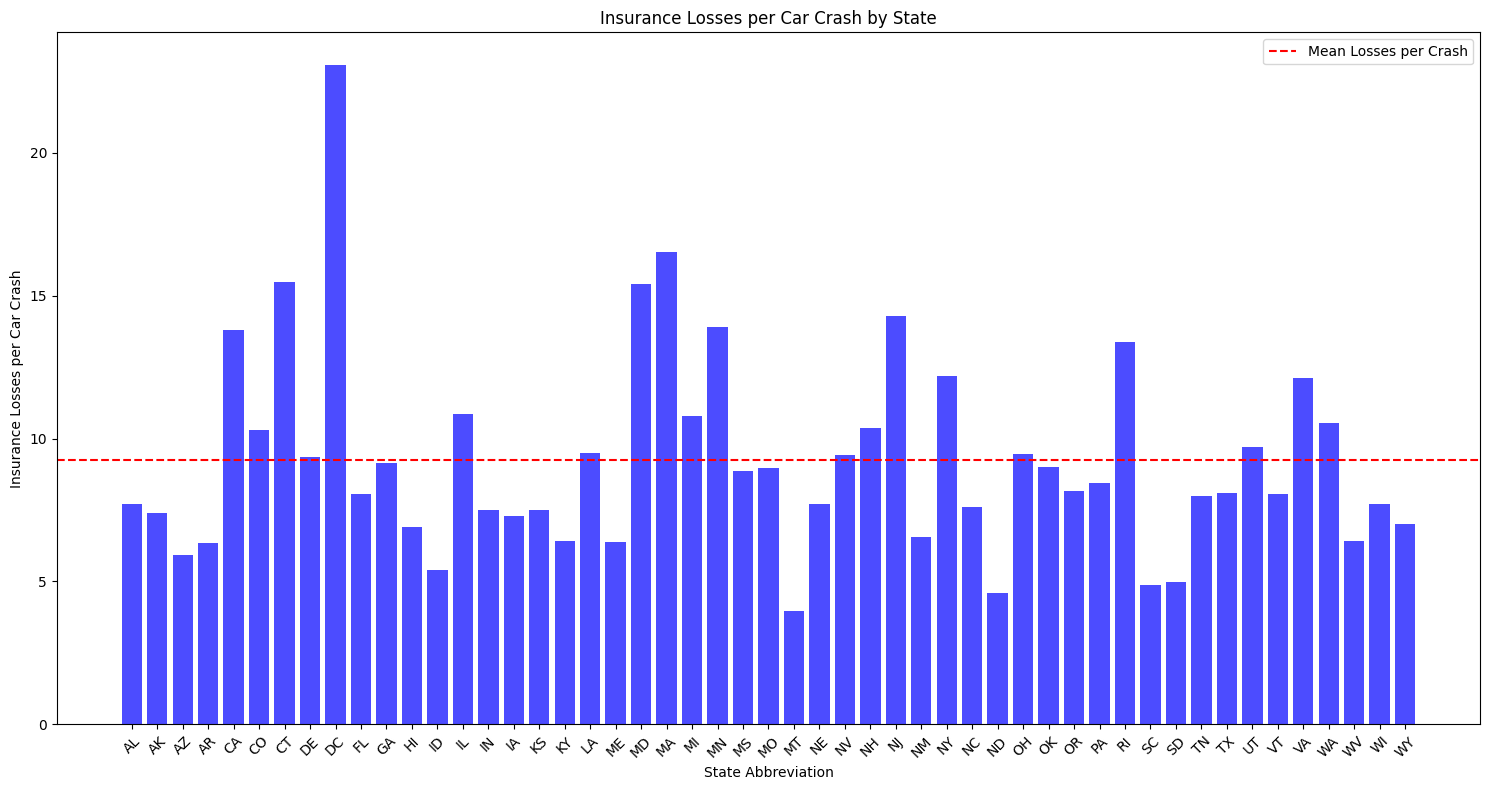

In [ ]:
plt.figure(figsize = (15,8))
plt.bar(df["abbrev"] , df["losses_per_crash"] , color = "b" , alpha = 0.7)
plt.xlabel('State Abbreviation')
plt.ylabel('Insurance Losses per Car Crash')
plt.title('Insurance Losses per Car Crash by State')
plt.xticks(rotation=45)
plt.axhline(df['losses_per_crash'].mean(), color='r', linestyle='--', label='Mean Losses per Crash')
plt.legend()
plt.tight_layout()
plt.show()

# **Create a histogram of insurance premiums.**

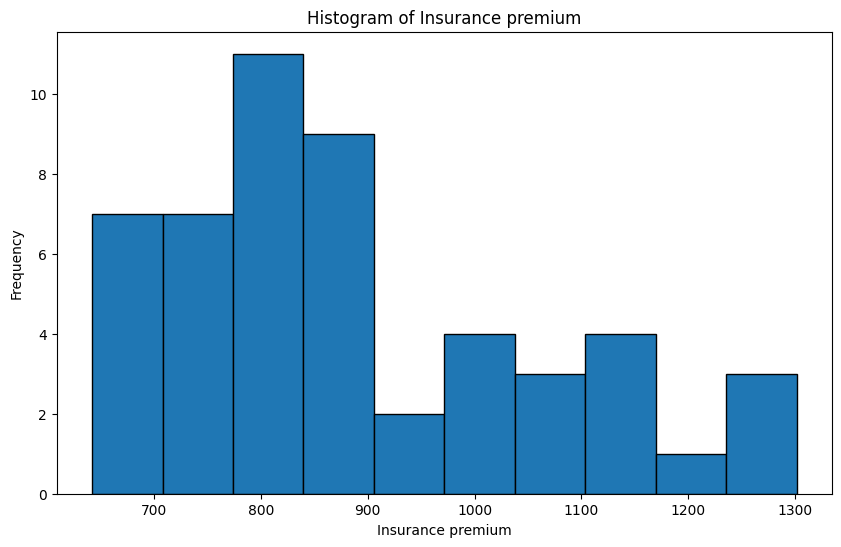

In [ ]:
df["ins_premium"].plot(kind = "hist" , edgecolor = "black" , figsize= (10,6))
plt.title("Histogram of Insurance premium")
plt.xlabel("Insurance premium")
plt.show()

# **Calculate the mean and standard deviation of insurance premiums.**

In [ ]:
df["ins_premium"].describe()

count      51.000000
mean      886.957647
std       178.296285
min       641.960000
25%       768.430000
50%       858.970000
75%      1007.945000
max      1301.520000
Name: ins_premium, dtype: float64